In [1]:
!pip install nptdms

In [2]:
from nptdms import TdmsFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

multipliers = {
    'p': 1e-12,
    'n': 1e-9,
    'u': 1e-6,
    'm': 1e-3,
    'k': 1e3,
    'M': 1e6,
    'G': 1e9,
    '':1
}

def TDMS_File(file_path):
    tdms_file = TdmsFile.read(file_path)

    Groups_DataFrame = []

    for group in tdms_file.groups():
        
        Groups_DataFrame.append(tdms_file[group.name].as_dataframe())
        print(group.name)
    
    return Groups_DataFrame

def convert(valor):
    if isinstance(valor, str):
        valor = valor.replace(',', '.')
        for sufijo, mult in multipliers.items():
            if valor.endswith(sufijo):
                try:
                    return float(valor.replace(sufijo, '')) * mult
                except:
                    return None
    return valor

def Excel_File(file_path):
    df = pd.read_excel(file_path)
    for col in df.columns:
        df[col] = df[col].map(convert)
    return df

COHERENTE

In [4]:
LASER_G2_2US = Excel_File("LASER_G2_2US.xlsx")
LASER_RATES = Excel_File("LASER_RATES.xlsx")
LASER_SSH = Excel_File("LASER_SSH.xlsx")

In [199]:
LASER_RATES

,Time - Singles 1,Count rates (per second) - Singles 1,Time - Singles 2,Count rates (per second) - Singles 2,Time - Singles 3,Count rates (per second) - Singles 3,Time - Singles 4,Count rates (per second) - Singles 4,Time - Singles 5,Count rates (per second) - Singles 5,...,Time - Coinc 1+3+4,Count rates (per second) - Coinc 1+3+4,Time - Coinc 2+3+4,Count rates (per second) - Coinc 2+3+4,Time - Coinc 1+2+3+4,Count rates (per second) - Coinc 1+2+3+4,Time - Plot 19,Count rates (per second) - Plot 19,Time - Plot 20,Count rates (per second) - Plot 20
0,17094,886950.0,17094,463030.0,17094,0,17094,0,17094,0,...,17094,0,17094,0,17094,0,17094,2700.0,17094,2300.0
1,17095,883160.0,17095,461760.0,17095,0,17095,0,17095,0,...,17095,0,17095,0,17095,0,17095,2700.0,17095,2300.0
2,17096,886080.0,17096,465570.0,17096,0,17096,0,17096,0,...,17096,0,17096,0,17096,0,17096,2700.0,17096,2300.0
3,17097,885190.0,17097,464040.0,17097,0,17097,0,17097,0,...,17097,0,17097,0,17097,0,17097,2700.0,17097,2300.0
4,17098,891690.0,17098,462990.0,17098,0,17098,0,17098,0,...,17098,0,17098,0,17098,0,17098,2700.0,17098,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,17199,880600.0,17199,461130.0,17199,0,17199,0,17199,0,...,17199,0,17199,0,17199,0,17199,2700.0,17199,2300.0
106,17200,879580.0,17200,461610.0,17200,0,17200,0,17200,0,...,17200,0,17200,0,17200,0,17200,2700.0,17200,2300.0
107,17201,886220.0,17201,460940.0,17201,0,17201,0,17201,0,...,17201,0,17201,0,17201,0,17201,2700.0,17201,2300.0
108,17202,891140.0,17202,459630.0,17202,0,17202,0,17202,0,...,17202,0,17202,0,17202,0,17202,2700.0,17202,2300.0


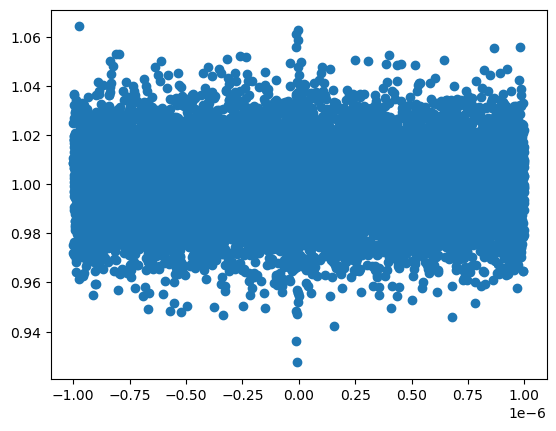

In [73]:
plt.scatter(LASER_G2_2US["tau (s) - HBT Measurement"], LASER_G2_2US["g^(2)(tau) - HBT Measurement"])

In [67]:
#Esta parte es con el qtau

Datos_laser1 = TDMS_File("Laser_FPGA_100ms.tdms")[0]
Datos_laser2 = TDMS_File("Laser_FPGA_100ms_2.tdms")[0]
CanalA_laser, CanalB_laser, _, CoinAB_laser, _, _, _ = TDMS_File("Laser_FPGA_100ms_cortos.tdms")

Datos
Datos
Canal A
Canal B
Canal C
Coincidencias AB
Coincidencias AC
Coincidencias BC
Coincidencias ABC


In [163]:
channels = Datos_laser1.mean().iloc[:2].to_numpy()
channels

array([47124.7       , 89291.28333333])

In [165]:
#tau_coin para largos

taus_largos = Datos_laser1.mean().iloc[2:].to_numpy() / (channels[0]*channels[1])
taus_largos

array([1.94839379e-07, 1.77558084e-07, 1.30217711e-07, 1.57733907e-07,
       2.31077421e-07, 1.17245847e-07, 1.20212542e-07, 1.59417278e-07,
       2.16616268e-07, 1.15970446e-07, 6.22213781e-08, 1.63017713e-07,
       2.37593059e-07, 1.27658986e-07, 1.69196678e-07, 1.36570954e-07,
       1.80302970e-07, 2.51392746e-07, 1.36265967e-07, 1.45364096e-07,
       1.28158057e-07])

In [103]:
#tau_coin para cortos
taus_cortos = CoinAB_laser.mean() / (CanalA_laser.mean() *CanalB_laser.mean())
taus_cortos = taus_cortos.to_numpy()
taus_cortos

array([5.55205281e-08, 5.33833752e-08, 5.49327973e-08, 5.35220677e-08,
       5.54474004e-08, 5.62332018e-08, 5.66572278e-08, 5.28229546e-08,
       5.50873999e-08, 5.10718855e-08, 5.65997308e-08, 5.25290783e-08,
       5.44132546e-08, 5.70171551e-08, 5.26132157e-08, 5.50488176e-08,
       5.35637734e-08, 5.39233494e-08, 5.62058377e-08, 5.25853264e-08])

SPDC

In [7]:
SPDC_G2 = Excel_File("SPDC_G2.xlsx")
SPDC_RATES = Excel_File("SPDC_RATES.xlsx")
SPDC_SSH = Excel_File("SPDC_SSH.xlsx")

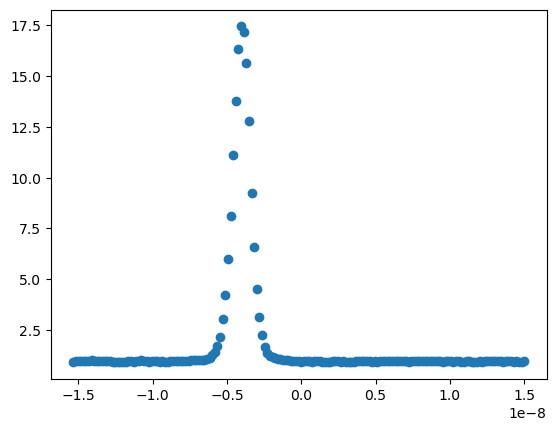

In [8]:
plt.scatter(SPDC_G2["tau (s) - HBT Measurement"], SPDC_G2["g^(2)(tau) - HBT Measurement"])

PSEUDOTÉRMICA

In [25]:
CanalA, CanalB, CanalC, CoinAB, CoinAC, CoinBC, CoinABC = TDMS_File("termica_FPGA_100ms_cortos_3.25V.tdms")

Canal A
Canal B
Canal C
Coincidencias AB
Coincidencias AC
Coincidencias BC
Coincidencias ABC


In [143]:
taussss = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])*10

In [133]:
 g2_term = CoinAB.mean().to_numpy() / (CanalA.mean().to_numpy()* CanalB.mean().to_numpy() *  taus_cortos)

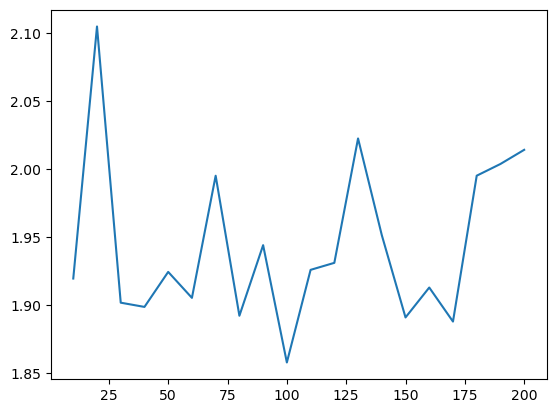

In [147]:
plt.plot(taussss, g2_term)

In [155]:
Datos1 = TDMS_File("termica_FPGA_100ms_largos_3.25V_2.tdms")[0]

Datos


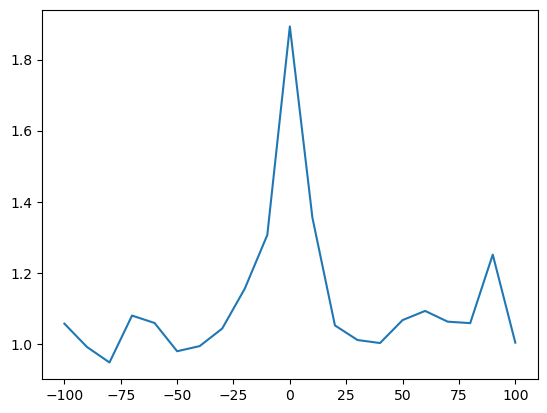

In [187]:
channels_term = Datos1.mean().iloc[:2].to_numpy()
channels_term

g2_term2 = Datos1.mean().iloc[2:].to_numpy() / (channels_term[0]*channels_term[1]*taus_largos)
taus_term = np.arange(-10, 11, 1)*10

plt.plot(taus_term, g2_term2)

In [185]:
g2_term2

array([7.75618219, 7.75618219, 7.75618219, 7.75618219, 7.75618219,
       7.75618219, 7.75618219, 7.75618219, 7.75618219, 7.75618219,
       7.75618219, 7.75618219, 7.75618219, 7.75618219, 7.75618219,
       7.75618219, 7.75618219, 7.75618219, 7.75618219, 7.75618219,
       7.75618219])

In [31]:
Datos2 = TDMS_File("termica_FPGA_100ms_largos_0.75V.tdms")

Datos


In [47]:
Datos2

[    Canal A  Canal B  -100us  -90us  -80us  -70us  -60us  -50us  -40us  -30us  \
 0     15638    31352     172    138     85    157    222     94    105    162   
 1     19754    39586     195    181    129    222    287    127    148    248   
 2     15747    32002     141    129     94    144    194     86     98    161   
 3     15003    30398     115     95     86    127    178     98     90    138   
 4     15185    30736     160    128     89    127    206     87     77    139   
 5     19152    38398     246    173    130    173    284    124    123    218   
 6     15688    30973     145    114     91    136    211    110    107    146   
 7     16038    32217     141    157    100    145    227     99    100    166   
 8     14895    29917     146    113     93    130    167     80     91    155   
 9     18997    37604     223    158    121    189    266    142    126    213   
 10    14662    29477     151    118     73    108    207     80     80    135   
 11    16154    

In [33]:
Datos3 = TDMS_File("termica_FPGA_100ms_largos_1V.tdms")

Datos


In [35]:
Datos4 = TDMS_File("termica_FPGA_100ms_largos_5V.tdms")

Datos


In [39]:
Datos5 = TDMS_File("termica_FPGA_100ms_largos_10V.tdms")

Datos
